In [1]:
!pip install -U transformers==4.41.2 torch scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# ✅ 关键参数：避免访问不存在的 additional_chat_templates 文件夹
tokenizer = AutoTokenizer.from_pretrained(MODEL, trust_remote_code=True, revision="main")
model = AutoModelForSequenceClassification.from_pretrained(MODEL, trust_remote_code=True, revision="main")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [4]:
def same_seeds(seed=87):
    import random, numpy as np, torch
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/project/train.csv'
import pandas as pd
df = pd.read_csv(path)[['text','sentiment','selected_text']]
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df.dropna().reset_index(drop=True)
train_df = df.sample(frac=0.8, random_state=42)
val_df = df.drop(train_df.index)
train_text = train_df['text'].tolist()
train_sentiment = train_df['sentiment'].tolist()
train_selected_text = train_df['selected_text'].tolist()
val_text = val_df['text'].tolist()
val_sentiment = val_df['sentiment'].tolist()
val_selected_text = val_df['selected_text'].tolist()


text             object
sentiment        object
selected_text    object
dtype: object
                                                text sentiment  \
0   WOOOOOOOOOO   are you coming to Nottingham at...  positive   
1                 resting had a whole day of walking   neutral   
2  was in Palawan a couple of days ago, i`ll try ...   neutral   
3   I know! I`m so slow its horrible. DON`T TELL ...  negative   
4  Glad I went out, glad I didn`t leave early, an...  positive   

                                       selected_text  
0                                   t?  lovelovelove  
1                 resting had a whole day of walking  
2  was in Palawan a couple of days ago, i`ll try ...  
3                                          horrible.  
4                                               glad  
            text      sentiment  selected_text
0  <class 'str'>  <class 'str'>  <class 'str'>
1  <class 'str'>  <class 'str'>  <class 'str'>
2  <class 'str'>  <class 'str'>  <class 'str'>

/tmp/ipython-input-1404077916.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(type).head())


In [7]:

import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn as nn
import os
import pandas as pd

class LLMDataset(Dataset):
    def __init__(self, text, sentiment, selected_text = None, tokenizer = None, model = 'train', max_len=64):
      self.tokenizer = tokenizer
      self.model = model
      self.text = text
      self.sentiment = sentiment
      self.max_len = max_len # 保存 max_len
      if self.model in ['train','val']:
        self.selected_text = selected_text

    def __getitem__(self, idx):
      # 因为我们 .dropna() 了，所以这里 str() 只是额外的保险
      text = str(self.text[idx])
      sentiment = str(self.sentiment[idx])

      # 关键修复：只调用一次 tokenizer，同时请求 offset
      # truncation=True 会自动截断所有内容，包括 offset_mapping
      xencoded = self.tokenizer(
                                  sentiment,
                                  text,
                                  truncation=True,
                                  padding='max_length',
                                  max_length=self.max_len,
                                  return_tensors='pt',
                                  return_offsets_mapping=True
                               )

      # 分离模型输入和 offset 列表
      encoded = {key: val.squeeze(0) for key, val in xencoded.items() if key != 'offset_mapping'}
      offsets = xencoded['offset_mapping'].squeeze(0).tolist()

      if self.model in ['train','val']:
        selected_text_str = str(self.selected_text[idx])

        start_char = text.find(selected_text_str)
        end_char = start_char + len(selected_text_str)

        # 设置安全的默认值 (4, 4)，即 text 的第一个 token
        # 这会处理所有 "找不到" (start_char == -1) 的情况（比如拼写错误的脏数据）
        start = 4
        end = 4

        if start_char != -1: # 只有在 找得到 的情况下才去搜索
            start_found = False
            for i, (start_offset, end_offset) in enumerate(offsets):
              if i <= 3: # 跳过 [CLS], sentiment, [SEP], [SEP]
                continue
              if start_offset == 0 and end_offset == 0: # 跳过 padding
                continue

              if not start_found and start_offset <= start_char < end_offset:
                start = i
                start_found = True

              if start_found and start_offset < end_char <= end_offset:
                end = i
                break

            if start_found and end < start: # 如果 end 没找到 (被截断了)
                end = start

        # 返回正确的 tensor 格式
        return encoded, torch.tensor([start, end])
      else:
        return encoded

    def __len__(self):
      return len(self.text)

In [8]:
class TweetExtractionModel(nn.Module):
    def __init__(self, model_name):
        super().__init__()
        from transformers import AutoModel
        self.roberta = AutoModel.from_pretrained(model_name)
        hidden = self.roberta.config.hidden_size
        self.dropout = nn.Dropout(0.1)
        self.start_fc = nn.Linear(hidden, 1)
        self.end_fc = nn.Linear(hidden, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden = outputs.last_hidden_state    # [batch, seq_len, hidden]
        last_hidden = self.dropout(last_hidden)
        start_logits = self.start_fc(last_hidden).squeeze(-1)
        end_logits   = self.end_fc(last_hidden).squeeze(-1)
        return start_logits, end_logits


In [9]:
from tqdm import tqdm
import math
import numpy as np
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
config = { 'seed':87,
          'batch_size':16,
           'n_epochs':4,
           'learning_rate':2e-5,
           'model_path':'./models/model.ckpt',
           'early_stop':1,
           'num_workers':4,
           'weight_decay':1e-5 }
device = 'cuda' if torch.cuda.is_available() else 'cpu'
max_len = 64 # 确保这个值和你的 tokenizer/config 一致
train_dataset = LLMDataset(train_text, train_sentiment, train_selected_text, tokenizer, 'train', max_len=max_len)
val_dataset = LLMDataset(val_text, val_sentiment, val_selected_text, tokenizer, 'val', max_len=max_len)
train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, num_workers=config['num_workers'])
val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=config['num_workers'])
model = TweetExtractionModel(model_name)
model.to(device)
same_seeds(config['seed'])

Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
from tqdm import tqdm
import math
import numpy as np
import torch
import os

def jaccard(str1, str2):
    """
    Calculates the Jaccard similarity score between two strings.
    """
    a = set(str(str1).lower().split())
    b = set(str(str2).lower().split())
    if not a and not b:
        return 1.0  # Both empty strings are a perfect match
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c)) if (len(a) + len(b) - len(c)) != 0 else 0.0


# --- 评估函数 (已修复索引 Bug) ---
def evaluate_jaccard(model, val_loader, tokenizer, val_dataset, device, batch_size):
    """
    Evaluates the model's performance on the validation set using the Jaccard score.
    Returns both overall and sentiment-specific Jaccard averages.
    """
    model.eval()

    # --- 存储各情感类别的jaccard总和与计数 ---
    jaccard_sum = {"positive": 0.0, "negative": 0.0, "neutral": 0.0}
    jaccard_count = {"positive": 0, "negative": 0, "neutral": 0}

    total_jaccard = 0.0
    total_count = 0

    with torch.no_grad():
        for batch_idx, (encoded, y) in tqdm(enumerate(val_loader), total=len(val_loader), desc="Eval Jaccard"):
            encoded = {k: v.to(device) for k, v in encoded.items()}
            start_logits, end_logits = model(**encoded)

            start_pred = torch.argmax(start_logits, dim=1)
            end_pred = torch.argmax(end_logits, dim=1)

            for i in range(len(start_pred)):
                global_idx = batch_idx * batch_size + i
                if global_idx >= len(val_dataset.selected_text):
                    continue

                s = start_pred[i].item()
                e = end_pred[i].item()
                if e < s:
                    e = s

                input_ids_tensor = encoded["input_ids"][i]
                pred_tokens = input_ids_tensor[s : e + 1]
                pred_text = tokenizer.decode(pred_tokens)
                true_text = val_dataset.selected_text[global_idx]

                # 计算当前样本的 jaccard
                score = jaccard(pred_text, true_text)
                total_jaccard += score
                total_count += 1

                # --- 按情感类别累积 ---
                sentiment = val_dataset.sentiment[global_idx].lower()
                if sentiment in jaccard_sum:
                    jaccard_sum[sentiment] += score
                    jaccard_count[sentiment] += 1

    # --- 平均化 ---
    overall = total_jaccard / total_count if total_count > 0 else 0.0
    sentiment_jaccard = {
        s: (jaccard_sum[s] / jaccard_count[s] if jaccard_count[s] > 0 else 0.0)
        for s in jaccard_sum
    }

    sentiment_jaccard["overall"] = overall
    return sentiment_jaccard


# --- 训练函数 ---
def train(train_loader, val_loader, model, device, config, val_dataset, tokenizer):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=config['learning_rate'],weight_decay=config['weight_decay'])

    best_jaccard = 0.0
    save_path = config['model_path']
    early_stop = 0
    train_loss_list = []
    val_loss_list = []

    if not os.path.isdir('./models'):
        os.mkdir('./models')

    for epoch in range(config['n_epochs']):
        model.train()  # ✅ 每轮开始前切回训练模式
        count = 0.0
        train_loss = 0.0

        # --- Training ---
        for i, data in tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch} Train"):
            optimizer.zero_grad()
            encoded, y = data
            encoded = {k: v.to(device) for k, v in encoded.items()}
            y = y.to(device)

            start, end = model(**encoded)
            start_loss = criterion(start, y[:, 0])
            end_loss = criterion(end, y[:, 1])
            loss = start_loss + end_loss
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            count += 1

        train_loss_list.append(train_loss / count)
        print(f"Epoch:{epoch} | train loss: {train_loss / count:.4f}")

        # --- Validation ---
        model.eval()
        val_loss = 0.0
        count = 0.0
        with torch.no_grad():
            for i, data in tqdm(enumerate(val_loader), total=len(val_loader), desc=f"Epoch {epoch} Val"):
                encoded, y = data
                encoded = {k: v.to(device) for k, v in encoded.items()}
                y = y.to(device)

                start, end = model(**encoded)
                start_loss = criterion(start, y[:, 0])
                end_loss = criterion(end, y[:, 1])
                loss = start_loss + end_loss

                val_loss += loss.item()
                count += 1

        val_loss_list.append(val_loss / count)
        val_jaccard_dict = evaluate_jaccard(model, val_loader, tokenizer, val_dataset, device, config['batch_size'])
        overall_jac = val_jaccard_dict["overall"]

        print(
              f"Epoch:{epoch} | val loss: {val_loss / count:.4f} | "
              f"Overall Jaccard: {overall_jac:.4f} | "
              f"Pos: {val_jaccard_dict['positive']:.4f} | "
              f"Neu: {val_jaccard_dict['neutral']:.4f} | "
              f"Neg: {val_jaccard_dict['negative']:.4f}"
              )

        # --- Early stopping logic ---
        if overall_jac > best_jaccard:
            best_jaccard = overall_jac
            early_stop = 0
            torch.save(model.state_dict(), save_path)
            print(f"✅ Model saved at epoch {epoch}, Jaccard improved to {overall_jac:.4f}")
        else:
            early_stop += 1
            if early_stop >= config["early_stop"]:
                print(f"⏹ Early stop at epoch {epoch}")
                break

        model.train()  # ✅ 验证完后回到训练模式

    return train_loss_list, val_loss_list  # ✅ return 放在循环外


In [13]:
train_loss = []
val_loss = []
train_loss,val_loss = train(train_loader,val_loader,model,device,config,val_dataset,tokenizer)

Epoch 0 Train: 100%|██████████| 1374/1374 [01:13<00:00, 18.77it/s]

Epoch:0 | train loss: 1.4620



Eval Jaccard: 100%|██████████| 344/344 [00:06<00:00, 54.02it/s]


Epoch:0 | val loss: 1.5266 | Overall Jaccard: 0.7020 | Pos: 0.5173 | Neu: 0.9669 | Neg: 0.5280
✅ Model saved at epoch 0, Jaccard improved to 0.7020


Epoch 1 Train: 100%|██████████| 1374/1374 [01:12<00:00, 18.87it/s]

Epoch:1 | train loss: 1.2337



Eval Jaccard: 100%|██████████| 344/344 [00:06<00:00, 54.99it/s]


Epoch:1 | val loss: 1.5768 | Overall Jaccard: 0.7060 | Pos: 0.5297 | Neu: 0.9685 | Neg: 0.5262
✅ Model saved at epoch 1, Jaccard improved to 0.7060


Epoch 2 Train: 100%|██████████| 1374/1374 [01:13<00:00, 18.78it/s]

Epoch:2 | train loss: 1.0029



Eval Jaccard: 100%|██████████| 344/344 [00:06<00:00, 54.43it/s]

Epoch:2 | val loss: 1.6907 | Overall Jaccard: 0.7012 | Pos: 0.5177 | Neu: 0.9653 | Neg: 0.5268
⏹ Early stop at epoch 2


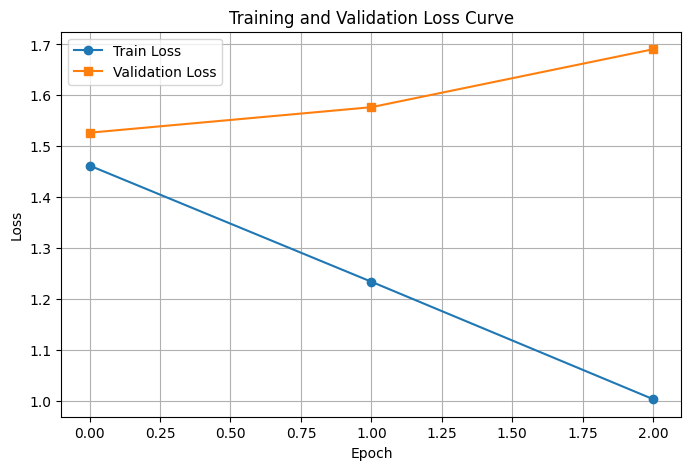

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='s')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
from tqdm import tqdm

model.eval()
N = 15  # 只看前5条
shown = 0

with torch.no_grad():
    for i in tqdm(range(len(val_dataset)), desc="Sample predictions"):
        text = val_dataset.text[i]
        sentiment = val_dataset.sentiment[i]
        true_text = val_dataset.selected_text[i]

        # 🔹重新调用 tokenizer 获取 offset_mapping
        encoded = tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=max_len,
            return_offsets_mapping=True,
            return_tensors='pt'
        )

        # 取出模型输入部分
        encoded_to_model = {k: v.to(device) for k, v in encoded.items() if k in ('input_ids', 'attention_mask')}
        offsets = encoded["offset_mapping"][0].numpy()

        # 🔹模型预测
        start_logits, end_logits = model(**encoded_to_model)
        start_pred = torch.argmax(start_logits, dim=1).item()
        end_pred = torch.argmax(end_logits, dim=1).item()

        # 🔹确保 s <= e
        s, e = min(start_pred, end_pred), max(start_pred, end_pred)
        start_char, end_char = int(offsets[s][0]), int(offsets[e][1])
        pred_text = text[start_char:end_char]

        # 🔹打印结果
        print(f"\n🟩 Example {shown+1}")
        print(f"Sentiment: {sentiment}")
        print(f"Text: {text}")
        print(f"✅ Predicted: {pred_text}")
        print(f"🎯 True: {true_text}")

        shown += 1
        if shown >= N:
            break


Sample predictions:   0%|          | 14/5496 [00:00<01:04, 84.90it/s]


🟩 Example 1
Sentiment: neutral
Text: wee. done with advance audit paper
✅ Predicted: wee. done with advance audit paper
🎯 True: wee. done with advance audit paper

🟩 Example 2
Sentiment: negative
Text: I`m bummed that I didn`t get TEDx tickets
✅ Predicted: bummed
🎯 True: bummed

🟩 Example 3
Sentiment: neutral
Text: There`s starwars day? ) OMG Rocio!
✅ Predicted: OMG Rocio!
🎯 True: There`s starwars day? ) OMG Rocio!

🟩 Example 4
Sentiment: negative
Text: _zorz_peep count yourself lucky i was gonna say the OTHER word instead...and rsvp...sorry i cant come to ur birthday...day?
✅ Predicted: ...sorry i cant come to ur birthday...day?
🎯 True: sorry

🟩 Example 5
Sentiment: neutral
Text: No more tickets for today.  Having dinner with Mimcy after work, then we head home. Then again, she might get a call
✅ Predicted: No more tickets for today.  Having dinner with Mimcy after work, then we head home. Then again, she might get a call
🎯 True: No more tickets for today.  Having dinner with Mimcy a

In [16]:
path = '/content/drive/MyDrive/project/test.csv'
import pandas as pd
df = pd.read_csv(path)[['text','sentiment']]
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df.dropna().reset_index(drop=True)
test_text = df['text'].tolist()
test_sentiment = df['sentiment'].tolist()


In [17]:
def test_model(model, tokenizer, test_texts, test_sentiments, device, max_len=64, num_samples=10):
    """
    使用训练好的模型在测试/验证集上进行推理，并打印部分样本结果。
    参数:
        model: 训练好的 TweetExtractionModel
        tokenizer: 与模型对应的 tokenizer
        test_texts: 文本列表
        test_sentiments: 对应的情感列表
        device: 'cuda' 或 'cpu'
        max_len: tokenizer 最大长度
        num_samples: 打印的样本数量（默认10）
    """

    model.eval()
    preds, spans = [], []
    n = len(test_texts)

    with torch.no_grad():
        for i in tqdm(range(n), desc="Testing"):
            text = test_texts[i]
            sentiment = test_sentiments[i]

            # 重新调用 tokenizer 以获得 offset_mapping
            encoded = tokenizer(
                text,
                truncation=True,
                padding='max_length',
                max_length=max_len,
                return_offsets_mapping=True,
                return_tensors='pt'
            )

            offsets = encoded["offset_mapping"][0].numpy()
            encoded_to_model = {k: v.to(device) for k, v in encoded.items() if k in ("input_ids", "attention_mask")}

            # 模型预测
            start_logits, end_logits = model(**encoded_to_model)
            start_pred = torch.argmax(start_logits, dim=1).item()
            end_pred = torch.argmax(end_logits, dim=1).item()

            # 修正反序
            s, e = min(start_pred, end_pred), max(start_pred, end_pred)
            start_char, end_char = int(offsets[s][0]), int(offsets[e][1])
            pred_text = text[start_char:end_char]

            preds.append(pred_text)
            spans.append((s, e))

            # 打印部分样本
            if i < num_samples:
                print(f"\n🟩 Example {i+1}")
                print(f"Sentiment: {sentiment}")
                print(f"Text: {text}")
                print(f"✅ Predicted: {pred_text}")

    print(f"\n✅ Finished! Generated {len(preds)} predictions.")
    return preds, spans


In [18]:
test_model(model,tokenizer,test_text,test_sentiment,device)

Testing:   0%|          | 9/3534 [00:00<00:42, 82.25it/s]


🟩 Example 1
Sentiment: positive
Text:  Thank you so much phaoloo !!!!
✅ Predicted: Thank you so much

🟩 Example 2
Sentiment: negative
Text: Midnight ice-cream weather! So **** bored
✅ Predicted: bored

🟩 Example 3
Sentiment: positive
Text: Ohh i forgot to tell you last night that when i was a alton towers i touched a shark  it was amazing !!!! it was nt a massive one tho
✅ Predicted: was amazing

🟩 Example 4
Sentiment: neutral
Text: i am the only arabic girl who`s online  every one is  a sleep ..
✅ Predicted: i am the only arabic girl who`s online  every one is  a sleep ..

🟩 Example 5
Sentiment: neutral
Text: starting the video editing of the first spanking movie we did with Mina ... it will be added to the next update
✅ Predicted: video editing of the first spanking movie we did with Mina ... it will be added to the next update

🟩 Example 6
Sentiment: neutral
Text:  I have it.  Hehehehe u want the torrent?
✅ Predicted: Hehehehe

🟩 Example 7
Sentiment: neutral
Text: I wanna do someth

Testing: 100%|██████████| 3534/3534 [00:37<00:00, 93.49it/s]


✅ Finished! Generated 3534 predictions.


(['Thank you so much',
  'bored',
  'was amazing',
  'i am the only arabic girl who`s online  every one is  a sleep ..',
  'video editing of the first spanking movie we did with Mina ... it will be added to the next update',
  'Hehehehe',
  'But I dunno what...',
  ';i miss',
  'love your books',
  'its dirty',
  'the carnage.',
  'Happy Mother`s Day!',
  'Going to clean my room but thats not hard.',
  'swine flu is **** house',
  'freaked out!!poor wee thing',
  '#MandarinMonday',
  'care',
  'i didnt get in trouble.',
  '**** fiesta at my house in my mouth  hit me up for the password',
  'love love love pot psycology. My Friday night treat',
  'damned expensive',
  'won`t pull up.',
  'm loling.',
  'failed',
  'crashes way too much  hmph',
  'Very much true!',
  'cut me off!',
  'thanks amy, its full of hotness',
  'Crying?',
  '-pretty fly for a white guy. haha.',
  'fun',
  'i love you',
  'blah blah.',
  'Poor medicated baby',
  '..i like i like',
  'Fixing openbox theme a little

In [19]:
import pandas as pd
import torch
from tqdm import tqdm

def generate_submission(model, tokenizer, test_texts, test_sentiments, device, max_len=64, save_path='test.csv'):
    """
    在测试集上生成预测结果并保存为 test.csv
    结果包含: text, sentiment, selected_text
    """
    model.eval()
    preds = []

    with torch.no_grad():
        for text, sentiment in tqdm(zip(test_texts, test_sentiments), total=len(test_texts), desc="Generating test.csv"):
            # 重新tokenize拿offset
            encoded = tokenizer(
                text,
                truncation=True,
                padding='max_length',
                max_length=max_len,
                return_offsets_mapping=True,
                return_tensors='pt'
            )
            offsets = encoded["offset_mapping"][0].numpy()
            encoded_to_model = {k: v.to(device) for k, v in encoded.items() if k in ("input_ids", "attention_mask")}

            # 模型预测
            start_logits, end_logits = model(**encoded_to_model)
            start_pred = torch.argmax(start_logits, dim=1).item()
            end_pred = torch.argmax(end_logits, dim=1).item()

            s, e = min(start_pred, end_pred), max(start_pred, end_pred)
            start_char, end_char = int(offsets[s][0]), int(offsets[e][1])
            pred_text = text[start_char:end_char].strip()

            preds.append(pred_text)

    df = pd.DataFrame({
        "text": test_texts,
        "sentiment": test_sentiments,
        "selected_text": preds
    })

    df.to_csv(save_path, index=False, encoding='utf-8-sig')
    print(f"✅ Saved {len(preds)} predictions to {save_path}")
    return df


In [20]:
model = TweetExtractionModel(model_name)
model.load_state_dict(torch.load('./models/model.ckpt', map_location=device))
model.to(device)

df_sub = generate_submission(model, tokenizer, test_text, test_sentiment, device, save_path='test.csv')


Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating test.csv: 100%|██████████| 3534/3534 [00:37<00:00, 94.82it/s]

✅ Saved 3534 predictions to test.csv
